# File Header

**File Author**: Emily Fletcher

**Student Number**: 18410839

**File Purpose**: Passing a set of images into a Data Set, Aim is to train a model  
              on recognition of the 5 people sampled.

**Last Changed**: 16/05/2023

**Last Model Download**: 16/05/2023

**Version**: 1.0

**Instructions**

Ensure model is corrected to Google Drive with correct directories before proceeding through Stage 2 Onwards

# Stage 1: Connecting to the Google Drive

In [ ]:
from google.colab import drive
import os
# Force Remount to account for Google Drive Reload Errors
drive.mount('/content/drive', force_remount=True)

#Checking Path is valid 
print(os.path.exists('/content/drive/MyDrive/DataSetAIAssignment/training'))
print(os.path.exists('/content/drive/MyDrive/DataSetAIAssignment/test'))
print(os.path.exists('/content/drive/MyDrive/DataSetAIAssignment/validation'))

Mounted at /content/drive
True
True
True


In [ ]:
import os, shutil

# Main File Path
base_dir = '/content/drive/MyDrive/DataSetAIAssignment/'

# Setting Parent Folders
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Setting Train Folders For Users
train_CB_dir = os.path.join(train_dir, 'CB') # CB
train_EF_dir = os.path.join(train_dir, 'EF') # EF
train_JS_dir = os.path.join(train_dir, 'JS') # JS
train_MB_dir = os.path.join(train_dir, 'MB') # MB
train_RK_dir = os.path.join(train_dir, 'RK') # RK

# Setting Validation Folders For Users
validation_CB_dir = os.path.join(validation_dir, 'CB') # CB
validation_EF_dir = os.path.join(validation_dir, 'EF') # EF
validation_JS_dir = os.path.join(validation_dir, 'JS') # JS
validation_MB_dir = os.path.join(validation_dir, 'MB') # MB
validation_RK_dir = os.path.join(validation_dir, 'RK') # RK

# Setting Test Folders For Users
test_CB_dir = os.path.join(test_dir, 'CB') # CB
test_EF_dir = os.path.join(test_dir, 'EF') # EF
test_JS_dir = os.path.join(test_dir, 'JS') # JS
test_MB_dir = os.path.join(test_dir, 'MB') # MB
test_RK_dir = os.path.join(test_dir, 'RK') # RK


# Section 2: First Pass Of Iterations

*   Assigning Batch Size
*   Setting Image Size
*   Creating VGG16 Base






In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# Assigning Batches and Image Sizes 
# Image Sizes Allow For Size Consistency

# Training Batches
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)

# Validation Batches
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(180, 180),
    batch_size=32)

# Testing Batches
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32)


Found 391 files belonging to 5 classes.
Found 49 files belonging to 5 classes.
Found 49 files belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Creating of the VGG16 Pre-Trained Neural Network

# Weights State The Image Set That Should Be Used
# input_shape should match image size and type used in batches
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3),
    pooling=None
)
# Prints A Summary For The User, Allows Model Checks 
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
import numpy as np

# Assigning labels 
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

#Applying All Labels And Features To Each DataSet
train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 6s 6s/step


In [ ]:
# Applying Layers to the Model
# Helps to Prevent OverFitting
# Can Fine Tune By Adjusting Layers

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(7, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Fitting the Features And Labels From the VGG16 Model
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]

# Can Adjust epochs To Refine Model
# 20 Chosen as visualisation graph levels out at around pass 15
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
13/13 [==============================] - 2s 72ms/step - loss: 31.5225 - accuracy: 0.8235 - val_loss: 12.1606 - val_accuracy: 0.8571
Epoch 2/20
13/13 [==============================] - 1s 79ms/step - loss: 1.2471 - accuracy: 0.9872 - val_loss: 7.9393 - val_accuracy: 0.8776
Epoch 3/20
13/13 [==============================] - 1s 71ms/step - loss: 0.1514 - accuracy: 0.9923 - val_loss: 18.7728 - val_accuracy: 0.8571
Epoch 4/20
13/13 [==============================] - 1s 68ms/step - loss: 0.2183 - accuracy: 0.9847 - val_loss: 14.9757 - val_accuracy: 0.9184
Epoch 5/20
13/13 [==============================] - 1s 70ms/step - loss: 1.3415e-08 - accuracy: 1.0000 - val_loss: 14.9758 - val_accuracy: 0.9184
Epoch 6/20
13/13 [==============================] - 1s 71ms/step - loss: 0.1565 - accuracy: 0.9949 - val_loss: 16.7722 - val_accuracy: 0.8980
Epoch 7/20
13/13 [==============================] - 1s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 16.7722 - val_accuracy: 0.898

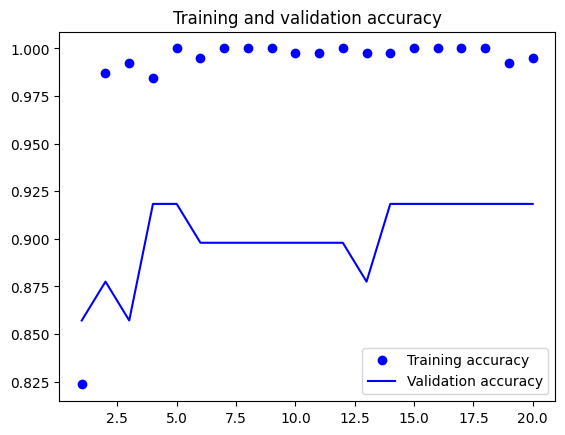

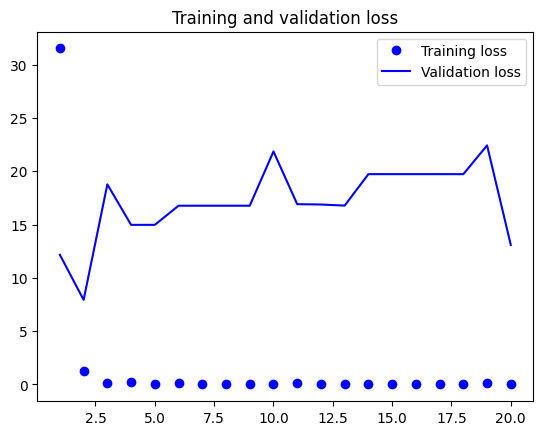

In [ ]:
# Generating Visualisation of the Passes
# Allows assessment of training 

# Poor accuracy or high loss could indicate a need to adjust the layers, parameters or review the data samples

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Section 3: Further Refinement and Second Set of Iterations

*   Freezing the Base VGG16 Model
*   Adding Image Transformation (Augmentation)



In [ ]:
# Re-initialising the VGG16 Model 
# This time bases are frozen, prevents overwriting of previous work

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
# THis shows to the author the effect of the freezing 
# If values are the same then the model has not be frozen and should be reviewed before continuing
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [ ]:
# Applying image transformations 

# Allows to artifically grow the dataset
# Applying image transformations 
# Allows to artifically grow the dataset
# Can adjust results by changing types of transformations and parameters
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Adding layers
# Can add more layers if needed to fine tune
# Same as previous method
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# Prints a model summary, allows for user to check accuracy 
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_2   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_2 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0   

In [ ]:
# Fitting the Features And Labels From the VGG16 Model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Can Adjust epochs To Refine Model
# 20 Chosen as visualisation graph levels out at around pass 15
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
13/13 [==============================] - 224s 16s/step - loss: 39.4619 - accuracy: 0.7238 - val_loss: 17.1357 - val_accuracy: 0.8776
Epoch 2/20
13/13 [==============================] - 223s 16s/step - loss: 2.8257 - accuracy: 0.9488 - val_loss: 6.1335 - val_accuracy: 0.8980
Epoch 3/20
13/13 [==============================] - 219s 16s/step - loss: 1.5533 - accuracy: 0.9616 - val_loss: 11.8884 - val_accuracy: 0.8776
Epoch 4/20
13/13 [==============================] - 221s 16s/step - loss: 1.4387 - accuracy: 0.9719 - val_loss: 6.2760 - val_accuracy: 0.8980
Epoch 5/20
13/13 [==============================] - 219s 16s/step - loss: 1.4751 - accuracy: 0.9770 - val_loss: 6.9554 - val_accuracy: 0.9184
Epoch 6/20
13/13 [==============================] - 220s 16s/step - loss: 1.5518 - accuracy: 0.9668 - val_loss: 9.0178 - val_accuracy: 0.9184
Epoch 7/20
13/13 [==============================] - 221s 16s/step - loss: 0.0026 - accuracy: 0.9974 - val_loss: 9.0058 - val_accuracy: 0.9388
Epo

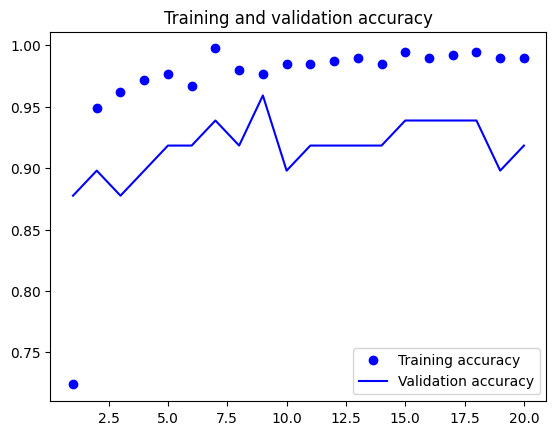

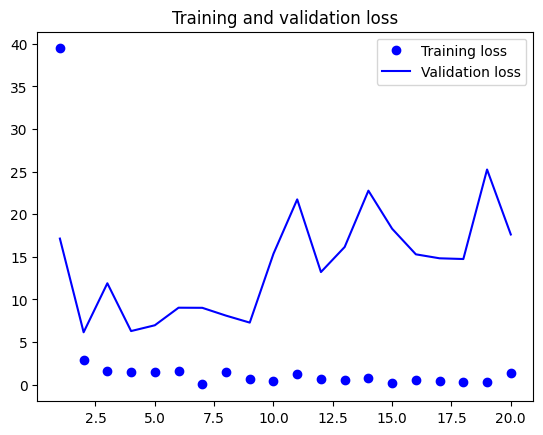

In [ ]:
# Generating Visualisation of the Passes
# Allows assessment of training 

# Poor accuracy or high loss could indicate a need to adjust the layers, parameters or review the data samples

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Finding the accuracy of the current model

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2/2 [==============================] - 23s 8s/step - loss: 26.8125 - accuracy: 0.8571
Test accuracy: 0.857


# Section 4: Final Interations and Fine Tuning


*   Un-Freezing Layers
*   Freezing Last Four Layers



In [ ]:
# Setting to true unfreezes all the previous frozen layers
# Removes the last four layers from being trainable
# Allows training for general features without removing all progress so far

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
# Building a summary of the current model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
# Compiling the final model before running the fitting process
# Can adjust the custom learning rate to fine tweak model
# Can adjust the epochs to fine tune the model

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
13/13 [==============================] - 247s 18s/step - loss: 0.4091 - accuracy: 0.9949 - val_loss: 13.0497 - val_accuracy: 0.9388
Epoch 2/30
13/13 [==============================] - 254s 18s/step - loss: 0.0807 - accuracy: 0.9949 - val_loss: 14.1537 - val_accuracy: 0.9184
Epoch 3/30
13/13 [==============================] - 249s 18s/step - loss: 0.0241 - accuracy: 0.9949 - val_loss: 13.8254 - val_accuracy: 0.9388
Epoch 4/30
13/13 [==============================] - 249s 18s/step - loss: 0.1586 - accuracy: 0.9974 - val_loss: 13.4397 - val_accuracy: 0.9184
Epoch 5/30
13/13 [==============================] - 251s 18s/step - loss: 0.3379 - accuracy: 0.9974 - val_loss: 12.6306 - val_accuracy: 0.9388
Epoch 6/30
13/13 [==============================] - 251s 18s/step - loss: 0.2469 - accuracy: 0.9923 - val_loss: 15.2164 - val_accuracy: 0.8980
Epoch 7/30
13/13 [==============================] - 246s 18s/step - loss: 0.5191 - accuracy: 0.9949 - val_loss: 12.9464 - val_accuracy: 0.9184

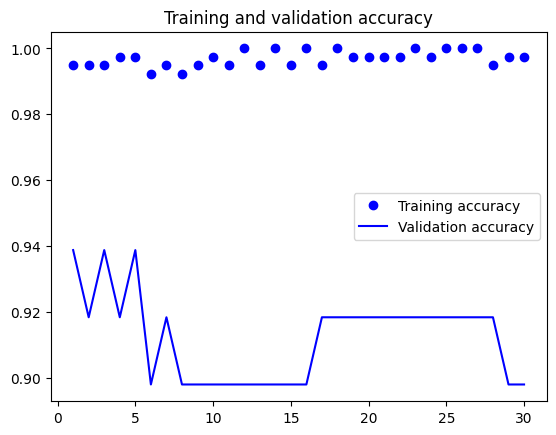

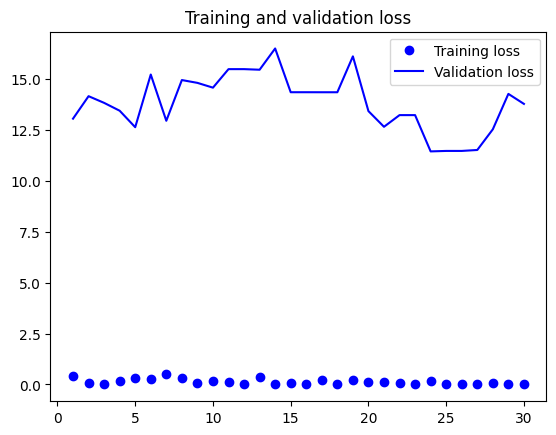

In [ ]:
# Generating Visualisation of the Passes
# Allows assessment of training 

# Poor accuracy or high loss could indicate a need to adjust the layers, parameters or review the data samples
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Final accuracy assessment fo total model

model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2/2 [==============================] - 22s 6s/step - loss: 25.4979 - accuracy: 0.8776
Test accuracy: 0.878


# Section 5: Downloading the Data Set

In [ ]:
# Comment Out When Not Using

#from google.colab import drive
#from google.colab import files

#model.save('/content/model.h5')

#feature_extraction = '/content/feature_extraction.keras'
#feature_extraction_with_data_aug = '/content/feature_extraction_with_data_augmentation.keras'
#fine_tuning = '/content/fine_tuning.keras'

#files.download(feature_extraction)
#files.download(feature_extraction_with_data_aug)
#files.download(fine_tuning)
#files.download('/content/model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>